<div style='background-color:orange'>
<a id="TableOfContents"></a>
    <h1 style='text-align:center ; top-padding:5px'>
        <b><i>
            TABLE OF CONTENTS:
        </i></b></h1>
    <li><a href='#imports'>Imports</a>
    <li><a href='#orientation'>Orientation</a>
    <li><a href="#initial">Initial Setup</a>
    <li><a href='#testsingle'>Test With Single Column</a>
    <li><a href='#testdouble'>Test With Double Columns</a>
    <li><a href='#functioncreation'>Create Function</a>
    <li><a href="#testfunction">Test Function</a>
    <li><a href='#visualizations'>Visualizations</a>
    <li><a href='#misc'>Miscellaneous</a>
    </li>
</div>

<div style='background-color:orange'>
<a id="imports"></a>
    <h1 style='text-align:center ; top-padding:5px'>
        <b><i>
            Imports
        </i></b></h1>
    <li><a href='#TableOfContents'>Table of Contents</a>
    </li>
</div>

In [1]:
# Vectorization and tables
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# .py files
import wrangle as w

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set default visualization style to 'bmh'
mpl.style.use('bmh')

<div style='background-color:orange'>
<a id="orientation"></a>
    <h1 style='text-align:center ; top-padding:5px'>
        <b><i>
            Orientation
        </i></b></h1>
    <li><a href='#TableOfContents'>Table of Contents</a>
    </li>
</div>

This file is deliberately and solely for the purpose of creating a weighted risk aggregation score column for each row in order to determine if this score can reliably be utilized.

<h3><b><i>
    Basic Idea For Weighted Aggregation:
</i></b></h3>

1. FOR EACH COLUMN
    1. For each unique value, get the injury type distribution by percent
        - (UNIQUE: B%, A%, N%, K%)
    2. Multiply injury type percentage for each unique value
        - B(Minor injury) * 1
        - A(Major injury) * 2
        - N(No injury) * 0
        - K(Fatal injury) * 3
    3. Sum of values / 3 for each unique value in column to equal risk value
2. Create 'risk_agg' Column
    1. Sum of all scores / Total columns used
3. Visualize?

<div style='background-color:orange'>
<a id="initial"></a>
    <h1 style='text-align:center ; top-padding:5px'>
        <b><i>
            Initial Setup
        </i></b></h1>
    <li><a href='#TableOfContents'>Table of Contents</a>
    </li>
</div>

In [3]:
# Get the master filtered dataset
master = w.wrangle()
master.head(3)

,crash_id,$1000_damage_to_any_one_person's_property,active_school_zone_flag,adjusted_average_daily_traffic_amount,adjusted_percentage_of_average_daily_traffic_for_trucks,adjusted_roadway_part,agency,at_intersection_flag,average_daily_traffic_amount,average_daily_traffic_year,...,charge,citation,person_age,person_ethnicity,person_gender,person_helmet,person_injury_severity,person_type,physical_location_of_an_occupant,crash_datetime
0,16189632,No,NO,no data,no data,1 - MAIN/PROPER LANE,"DEPARTMENT OF PUBLIC SAFETY, STATE OF TEXAS",False,no data,no data,...,OPERATE UNREGISTERED MOTOR VEHICLE,TX52Q80UKZPL,37,W - WHITE,1 - MALE,1 - NOT WORN,A - SUSPECTED SERIOUS INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2018-01-01 11:23:00
1,16203470,No,NO,no data,no data,1 - MAIN/PROPER LANE,"DEPARTMENT OF PUBLIC SAFETY, STATE OF TEXAS",False,no data,no data,...,"NO CLASS ""M"" LICENSE",TX52QD0NAP34,30,H - HISPANIC,1 - MALE,"3 - WORN, NOT DAMAGED",B - SUSPECTED MINOR INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2018-01-04 13:16:00
2,16192023,Yes,NO,no data,no data,1 - MAIN/PROPER LANE,HARRIS COUNTY SHERIFF'S OFFICE,False,no data,no data,...,NO CHARGES,no data,21,W - WHITE,1 - MALE,"2 - WORN, DAMAGED",A - SUSPECTED SERIOUS INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2018-01-05 20:45:00


<div style='background-color:orange'>
<a id="testsingle"></a>
    <h1 style='text-align:center ; top-padding:5px'>
        <b><i>
            Test With Single Column
        </i></b></h1>
    <li><a href='#TableOfContents'>Table of Contents</a>
    <li><a href='#testsingletest'>Test</a>
    <li><a href='#testsinglefunction'>Function</a>
    <li><a href='#testsinglesummary'>Summarization</a>
    </li>
</div>

<a id='testsingletest'></a>
<h3><b><i>
    Test
</i></b></h3>
<li><a href='#testsingle'>Test With Single Column Top</a></li>

In [4]:
# Use a single column initially for testing purposes
master.vehicle_defect_1.value_counts()

vehicle_defect_1
no data                                13678
98 - OTHER  (EXPLAIN IN NARRATIVE)       187
12 - DEFECTIVE OR SLICK TIRES            152
10 - DEFECTIVE OR NO VEHICLE BRAKES      107
11 - DEFECTIVE STEERING MECHANISM         38
5 - DEFECTIVE OR NO HEADLAMPS             10
13 - DEFECTIVE TRAILER HITCH               1
9 - DEFECTIVE OR NO TRAILER BRAKES         1
Name: count, dtype: int64

In [5]:
# Create a smaller dataset with target and above column
cols_for_single_testing = [
    'vehicle_defect_1',
    'person_injury_severity'
]
single_test = master[cols_for_single_testing]
single_test.sample()

,vehicle_defect_1,person_injury_severity
12188,no data,B - SUSPECTED MINOR INJURY


In [6]:
# Testing with single unique value ('no data') in column
temp_dict = single_test[single_test.vehicle_defect_1 == 'no data']['person_injury_severity'].value_counts(normalize=True).to_dict()
for key in temp_dict.keys():
    if key == 'A - SUSPECTED SERIOUS INJURY':
        temp_dict['A - SUSPECTED SERIOUS INJURY'] = temp_dict['A - SUSPECTED SERIOUS INJURY'] * 2
    elif key == 'K - FATAL INJURY':
        temp_dict['K - FATAL INJURY'] = temp_dict['K - FATAL INJURY'] * 3
risk_score = sum(temp_dict.values()) / 3
print(risk_score)

0.4687088755666033


In [7]:
# Testing with all unique values to get risk scores
risk_dict = {
    'Unique Value' : [],
    'Risk Score' : []
}
for val in single_test.vehicle_defect_1.unique():
    injury_distribution_dict = single_test[single_test.vehicle_defect_1 == val]['person_injury_severity'].value_counts(normalize=True).to_dict()
    for key in injury_distribution_dict.keys():
        if key == 'A - SUSPECTED SERIOUS INJURY':
            injury_distribution_dict['A - SUSPECTED SERIOUS INJURY'] = injury_distribution_dict['A - SUSPECTED SERIOUS INJURY'] * 2
        elif key == 'K - FATAL INJURY':
            injury_distribution_dict['K - FATAL INJURY'] = injury_distribution_dict['K - FATAL INJURY'] * 3
    risk_score = sum(injury_distribution_dict.values()) / 3
    risk_dict['Unique Value'].append(val)
    risk_dict['Risk Score'].append(risk_score)
pd.DataFrame(risk_dict)

,Unique Value,Risk Score
0,no data,0.468709
1,10 - DEFECTIVE OR NO VEHICLE BRAKES,0.386293
2,98 - OTHER (EXPLAIN IN NARRATIVE),0.445633
3,12 - DEFECTIVE OR SLICK TIRES,0.467105
4,11 - DEFECTIVE STEERING MECHANISM,0.421053
5,5 - DEFECTIVE OR NO HEADLAMPS,0.600000
6,13 - DEFECTIVE TRAILER HITCH,0.333333
7,9 - DEFECTIVE OR NO TRAILER BRAKES,0.333333


In [8]:
# Match value existing in dataset with risk_dict to get risk_score
for val in single_test.vehicle_defect_1:
    risk_index = risk_dict['Unique Value'].index(val)
    risk = risk_dict['Risk Score'][risk_index]
    print(risk)

0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.3862928348909657
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4687088755666033
0.4456327985

In [9]:
# Put it all together :D
risk_dict = {
    'Unique Value' : [],
    'Risk Score' : []
}
for unique_value in single_test.vehicle_defect_1.unique():
    injury_distribution_dict = single_test[single_test.vehicle_defect_1 == unique_value]['person_injury_severity'].value_counts(normalize=True).to_dict()
    for injury_type in injury_distribution_dict.keys():
        if injury_type == 'A - SUSPECTED SERIOUS INJURY':
            injury_distribution_dict['A - SUSPECTED SERIOUS INJURY'] = injury_distribution_dict['A - SUSPECTED SERIOUS INJURY'] * 2
        elif injury_type == 'K - FATAL INJURY':
            injury_distribution_dict['K - FATAL INJURY'] = injury_distribution_dict['K - FATAL INJURY'] * 3
    risk_score = sum(injury_distribution_dict.values()) / 3
    risk_dict['Unique Value'].append(unique_value)
    risk_dict['Risk Score'].append(risk_score)
risk_value_list = []
for value in single_test.vehicle_defect_1:
    risk_index = risk_dict['Unique Value'].index(value)
    risk = risk_dict['Risk Score'][risk_index]
    risk_value_list.append(risk)
single_test['risk_score'] = risk_value_list
single_test

,vehicle_defect_1,person_injury_severity,risk_score
0,no data,A - SUSPECTED SERIOUS INJURY,0.468709
1,no data,B - SUSPECTED MINOR INJURY,0.468709
2,no data,A - SUSPECTED SERIOUS INJURY,0.468709
3,no data,B - SUSPECTED MINOR INJURY,0.468709
4,no data,B - SUSPECTED MINOR INJURY,0.468709
...,...,...,...
14169,no data,B - SUSPECTED MINOR INJURY,0.468709
14170,5 - DEFECTIVE OR NO HEADLAMPS,A - SUSPECTED SERIOUS INJURY,0.600000
14171,no data,A - SUSPECTED SERIOUS INJURY,0.468709
14172,no data,B - SUSPECTED MINOR INJURY,0.468709


In [10]:
# Verify vehicle_defect_1 with risk_score
single_test.groupby('vehicle_defect_1')['risk_score'].value_counts()

vehicle_defect_1                     risk_score
10 - DEFECTIVE OR NO VEHICLE BRAKES  0.386293        107
11 - DEFECTIVE STEERING MECHANISM    0.421053         38
12 - DEFECTIVE OR SLICK TIRES        0.467105        152
13 - DEFECTIVE TRAILER HITCH         0.333333          1
5 - DEFECTIVE OR NO HEADLAMPS        0.600000         10
9 - DEFECTIVE OR NO TRAILER BRAKES   0.333333          1
98 - OTHER  (EXPLAIN IN NARRATIVE)   0.445633        187
no data                              0.468709      13678
Name: count, dtype: int64

---

<a id='testsinglefunction'></a>
<h3><b><i>
    Function
</i></b></h3>
<li><a href='#testsingle'>Test With Single Column Top</a></li>

In [11]:
def risk_scores_single_column(df, col_name):
    '''
    Takes in a pandas dataframe and the specific column that you want a specific
    risk value for each specific value in the column...
    Gives a list of risk values associated by each value in the column as well
    as the dictionary of unique values and their risk value...
    
    INPUT:
    df = Pandas dataframe for utilization
    col_name = The exact column name within 'df' that you want
    
    OUTPUT:
    risk_value_list = List of risk values by each value in the column
    '''
    risk_dict = {
    'Unique Value' : [],
    'Risk Score' : []
    }
    for unique_value in df[col_name].unique():
        injury_distribution_dict = df[df[col_name] == unique_value]['person_injury_severity'].value_counts(normalize=True).to_dict()
        for injury_type in injury_distribution_dict.keys():
            if injury_type == 'A - SUSPECTED SERIOUS INJURY':
                injury_distribution_dict['A - SUSPECTED SERIOUS INJURY'] = injury_distribution_dict['A - SUSPECTED SERIOUS INJURY'] * 2
            elif injury_type == 'K - FATAL INJURY':
                injury_distribution_dict['K - FATAL INJURY'] = injury_distribution_dict['K - FATAL INJURY'] * 3
        risk_score = sum(injury_distribution_dict.values()) / 3
        risk_dict['Unique Value'].append(unique_value)
        risk_dict['Risk Score'].append(risk_score)
    risk_value_list = []
    for value in df[col_name]:
        risk_index = risk_dict['Unique Value'].index(value)
        risk = risk_dict['Risk Score'][risk_index]
        risk_value_list.append(risk)
    return risk_dict, risk_value_list

In [12]:
# Test the function
test_dict, test_list = risk_scores_single_column(single_test, 'vehicle_defect_1')
print(pd.DataFrame(test_dict))
print(test_list)

                          Unique Value  Risk Score
0                              no data    0.468709
1  10 - DEFECTIVE OR NO VEHICLE BRAKES    0.386293
2   98 - OTHER  (EXPLAIN IN NARRATIVE)    0.445633
3        12 - DEFECTIVE OR SLICK TIRES    0.467105
4    11 - DEFECTIVE STEERING MECHANISM    0.421053
5        5 - DEFECTIVE OR NO HEADLAMPS    0.600000
6         13 - DEFECTIVE TRAILER HITCH    0.333333
7   9 - DEFECTIVE OR NO TRAILER BRAKES    0.333333
[0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.3862928348909657, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 

---

<a id='testsinglesummary'></a>
<h3><b><i>
    Summarization
</i></b></h3>
<li><a href='#testsingle'>Test With Single Column Top</a></li>

1. <b>Create risk_dict // PURPOSE: Assign each value a risk score</b>
    - Each unique value is a key
    - Risk score is value
2. <b>Create risk_value_list // PURPOSE: Risk score by value in row</b>
    - Using value in row, find index in risk_dict
    - Using index, get risk score

<div style='background-color:orange'>
<a id="testdouble"></a>
    <h1 style='text-align:center ; top-padding:5px'>
        <b><i>
            Test With Double Columns
        </i></b></h1>
    <li><a href='#TableOfContents'>Table of Contents</a>
    <li><a href='#testdoubletest'>Test</a>
    <li><a href='#testdoublefunction'>Function</a>
    <li><a href='#testdoublesummary'>Summarization</a>
    </li>
</div>

<a id='testdoubletest'></a>
<h3><b><i>
    Test
</i></b></h3>
<li><a href='#testdouble'>Test With Double Column Top</a></li>

In [13]:
# Add an additional column for testing purposes
master.person_ethnicity.value_counts()

person_ethnicity
W - WHITE                          9111
H - HISPANIC                       2944
B - BLACK                          1634
A - ASIAN                           223
98 - OTHER                          125
99 - UNKNOWN                         53
I - AMER. INDIAN/ALASKAN NATIVE      44
no data                              40
Name: count, dtype: int64

In [14]:
# Create a smaller dataset with target and above column
cols_for_double_testing = [
    'vehicle_defect_1',
    'person_ethnicity',
    'person_injury_severity'
]
two_test = master[cols_for_double_testing]
two_test.sample()

,vehicle_defect_1,person_ethnicity,person_injury_severity
6057,no data,W - WHITE,B - SUSPECTED MINOR INJURY


In [15]:
# Create list of columns to iterate through
col_to_score = [
    'vehicle_defect_1',
    'person_ethnicity'
]

In [16]:
# Try to create a list of risks for each column to iterate through
col_and_risk_dict = {}
for col in col_to_score:
    two_dict, two_list = risk_scores_single_column(two_test, col)
    col_and_risk_dict[col] = two_list

In [17]:
# Check to see if the risks are created properly
pd.DataFrame(col_and_risk_dict)

,vehicle_defect_1,person_ethnicity
0,0.468709,0.476786
1,0.468709,0.456522
2,0.468709,0.476786
3,0.468709,0.456522
4,0.468709,0.476786
...,...,...
14169,0.468709,0.476786
14170,0.600000,0.476786
14171,0.468709,0.476786
14172,0.468709,0.442880


In [18]:
len(col_and_risk_dict.keys())

2

In [19]:
# Aggregate across the row
row_sum = pd.DataFrame(col_and_risk_dict).sum(axis=1).to_list()
column_agg = []
for value in row_sum:
    row_agg = value / len(col_and_risk_dict)
    column_agg.append(row_agg)
print(column_agg)

[0.47274758891929114, 0.4626153073485191, 0.47274758891929114, 0.4626153073485191, 0.47274758891929114, 0.4557946662614738, 0.4626153073485191, 0.47274758891929114, 0.47274758891929114, 0.4626153073485191, 0.4626153073485191, 0.47274758891929114, 0.4626153073485191, 0.4626153073485191, 0.4626153073485191, 0.47274758891929114, 0.47274758891929114, 0.47274758891929114, 0.47274758891929114, 0.47274758891929114, 0.4626153073485191, 0.4557946662614738, 0.43153956858147235, 0.47274758891929114, 0.47274758891929114, 0.47274758891929114, 0.47274758891929114, 0.4557946662614738, 0.47274758891929114, 0.47274758891929114, 0.4626153073485191, 0.47274758891929114, 0.47274758891929114, 0.47274758891929114, 0.47274758891929114, 0.4557946662614738, 0.4557946662614738, 0.4626153073485191, 0.4626153073485191, 0.47274758891929114, 0.46920292263178653, 0.47274758891929114, 0.4626153073485191, 0.47274758891929114, 0.47274758891929114, 0.47274758891929114, 0.47274758891929114, 0.4557946662614738, 0.45579466

In [20]:
# See if it will append properly to the dataset
two_test['risk_agg'] = column_agg
two_test

,vehicle_defect_1,person_ethnicity,person_injury_severity,risk_agg
0,no data,W - WHITE,A - SUSPECTED SERIOUS INJURY,0.472748
1,no data,H - HISPANIC,B - SUSPECTED MINOR INJURY,0.462615
2,no data,W - WHITE,A - SUSPECTED SERIOUS INJURY,0.472748
3,no data,H - HISPANIC,B - SUSPECTED MINOR INJURY,0.462615
4,no data,W - WHITE,B - SUSPECTED MINOR INJURY,0.472748
...,...,...,...,...
14169,no data,W - WHITE,B - SUSPECTED MINOR INJURY,0.472748
14170,5 - DEFECTIVE OR NO HEADLAMPS,W - WHITE,A - SUSPECTED SERIOUS INJURY,0.538393
14171,no data,W - WHITE,A - SUSPECTED SERIOUS INJURY,0.472748
14172,no data,B - BLACK,B - SUSPECTED MINOR INJURY,0.455795


---

<a id='testdoublefunction'></a>
<h3><b><i>
    Function
</i></b></h3>
<li><a href='#testdouble'>Test With Double Column Top</a></li>

In [21]:
def risk_scores_iterate_columns(df, col_list):
    '''
    Takes in a pandas dataframe and a list of column names that you want to get a risk
    score from and get an overal aggregate risk score by row...
    Gives a list of aggregated risk values associated by each row in the dataframe as well
    as a list of dictionaries for risk scores in each column...
    
    INPUT:
    df = Pandas dataframe for utilization
    col_list = List of exact column names you want an aggregate risk score from
    
    OUTPUT:
    agg_risk_value_list = List of aggregated risk values by each value in the column
    column_risk_value_list_of_dicts = List of dictionaries for each column and their risk scores
    '''
    col_and_risk_dict = {}
    for col in col_list:
        risk_score_dict, risk_score_list = risk_scores_single_column(df, col)
        col_and_risk_dict[col] = risk_score_list
    row_sum = pd.DataFrame(col_and_risk_dict).sum(axis=1).to_list()
    column_agg = []
    for value in row_sum:
        row_agg = value / len(col_and_risk_dict)
        column_agg.append(row_agg)
    agg_risk_value_list = column_agg
    column_risk_value_list_of_dicts = col_and_risk_dict
    return agg_risk_value_list, column_risk_value_list_of_dicts

In [22]:
# Test the function
agg_test_list, agg_test_list_dict = risk_scores_iterate_columns(two_test, col_to_score)
print(agg_test_list_dict)
print(agg_test_list)

{'vehicle_defect_1': [0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.3862928348909657, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033, 0.4687088755666033

---

<a id='testdoublesummary'></a>
<h3><b><i>
    Summarization
</i></b></h3>
<li><a href='#testdouble'>Test With Double Column Top</a></li>

- Used the single column function to iterate through each column in a list
- Summed up scores on a row basis and divide by how many columns were used

<div style='background-color:orange'>
<a id="functioncreation"></a>
    <h1 style='text-align:center ; top-padding:5px'>
        <b><i>
            Create Function
        </i></b></h1>
    <li><a href='#TableOfContents'>Table of Contents</a>
    </li>
</div>

In [23]:
def risk_scores_iterate_columns(df, col_list):
    '''
    Takes in a pandas dataframe and a list of column names that you want to get a risk
    score from and get an overal aggregate risk score by row...
    Gives a list of aggregated risk values associated by each row in the dataframe as well
    as a list of dictionaries for risk scores in each column...
    
    INPUT:
    df = Pandas dataframe for utilization
    col_list = List of exact column names you want an aggregate risk score from
    
    OUTPUT:
    agg_risk_value_list = List of aggregated risk values by each value in the column
    column_risk_value_list_of_dicts = List of dictionaries for each column and their risk scores
    '''
    col_and_risk_dict = {}
    for col in col_list:
        risk_score_dict, risk_score_list = risk_scores_single_column(df, col)
        col_and_risk_dict[col] = risk_score_list
    row_sum = pd.DataFrame(col_and_risk_dict).sum(axis=1).to_list()
    column_agg = []
    for value in row_sum:
        row_agg = value / len(col_and_risk_dict)
        column_agg.append(row_agg)
    agg_risk_value_list = column_agg
    column_risk_value_list_of_dicts = col_and_risk_dict
    return agg_risk_value_list, column_risk_value_list_of_dicts

<div style='background-color:orange'>
<a id="testfunction"></a>
    <h1 style='text-align:center ; top-padding:5px'>
        <b><i>
            Test Function
        </i></b></h1>
    <li><a href='#TableOfContents'>Table of Contents</a>
    </li>
</div>

In [24]:
# Identify columns
test_cols = [
    'city',
    'contributing_factors',
    'county',
    'physical_feature_1',
    'physical_feature_2',
    'population_group',
    'driver_license_class',
    'driver_license_endorsements',
    'driver_license_restrictions',
    'driver_license_state',
    'driver_license_type',
]

In [25]:
# Use that function :D
test_list, test_list_of_dicts = risk_scores_iterate_columns(master, test_cols)
master['agg_risk_score'] = test_list
master.sample(10)

,crash_id,$1000_damage_to_any_one_person's_property,active_school_zone_flag,adjusted_average_daily_traffic_amount,adjusted_percentage_of_average_daily_traffic_for_trucks,adjusted_roadway_part,agency,at_intersection_flag,average_daily_traffic_amount,average_daily_traffic_year,...,citation,person_age,person_ethnicity,person_gender,person_helmet,person_injury_severity,person_type,physical_location_of_an_occupant,crash_datetime,agg_risk_score
11289,16436349,Yes,NO,no data,no data,1 - MAIN/PROPER LANE,LUBBOCK POLICE DEPARTMENT,False,no data,no data,...,no data,59,B - BLACK,1 - MALE,1 - NOT WORN,B - SUSPECTED MINOR INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2018-05-20 17:16:00,0.452853
5882,16358099,Yes,NO,no data,no data,2 - SERVICE/FRONTAGE ROAD,BRYAN POLICE DEPARTMENT,False,no data,no data,...,"308254, 308254, 308254, 308254",20,W - WHITE,1 - MALE,"2 - WORN, DAMAGED",B - SUSPECTED MINOR INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2018-04-16 11:29:00,0.469474
10857,19168642,Yes,NO,159,43.4,1 - MAIN/PROPER LANE,"DEPARTMENT OF PUBLIC SAFETY, STATE OF TEXAS",True,159,2019,...,"TX6F4J0TVWTK, TX6F4J0TVWTK",38,W - WHITE,1 - MALE,1 - NOT WORN,N - NOT INJURED,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2022-10-05 18:30:00,0.461919
5130,19030252,Yes,NO,no data,no data,1 - MAIN/PROPER LANE,CORPUS CHRISTI POLICE DEPARTMENT,True,no data,no data,...,no data,23,H - HISPANIC,1 - MALE,"2 - WORN, DAMAGED",A - SUSPECTED SERIOUS INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2022-07-27 12:15:00,0.458663
11174,16312913,No,NO,no data,no data,1 - MAIN/PROPER LANE,HARLINGEN POLICE DEPARTMENT,True,no data,no data,...,"E0001030, E0001030",22,W - WHITE,1 - MALE,1 - NOT WORN,B - SUSPECTED MINOR INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2018-03-17 18:53:00,0.450982
11960,17099853,Yes,NO,6363,7.5,1 - MAIN/PROPER LANE,ALICE POLICE DEPARTMENT,False,6363,2019,...,"520956, 520956, 520956",21,H - HISPANIC,1 - MALE,"2 - WORN, DAMAGED",B - SUSPECTED MINOR INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2019-05-30 16:02:00,0.485941
2019,17456961,Yes,NO,1630,14.7,1 - MAIN/PROPER LANE,"DEPARTMENT OF PUBLIC SAFETY, STATE OF TEXAS",False,1630,2019,...,no data,64,W - WHITE,2 - FEMALE,1 - NOT WORN,K - FATAL INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2019-12-07 18:21:00,0.501559
5649,16229395,Yes,NO,no data,no data,1 - MAIN/PROPER LANE,DALLAS POLICE DEPARTMENT,False,no data,no data,...,no data,39,W - WHITE,1 - MALE,1 - NOT WORN,B - SUSPECTED MINOR INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2018-02-01 17:18:00,0.480448
11794,16963457,Yes,NO,23213,7,1 - MAIN/PROPER LANE,SAN ANTONIO POLICE DEPARTMENT,False,23213,2019,...,no data,35,B - BLACK,1 - MALE,"2 - WORN, DAMAGED",A - SUSPECTED SERIOUS INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2019-03-22 02:58:00,0.454035
13980,19070747,No,NO,no data,no data,1 - MAIN/PROPER LANE,AUSTIN POLICE DEPARTMENT,False,no data,no data,...,no data,41,W - WHITE,1 - MALE,1 - NOT WORN,B - SUSPECTED MINOR INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2022-08-19 13:52:00,0.458475


<div style='background-color:orange'>
<a id="visualizations"></a>
    <h1 style='text-align:center ; top-padding:5px'>
        <b><i>
            Visualizations
        </i></b></h1>
    <li><a href='#TableOfContents'>Table of Contents</a>
    </li>
</div>

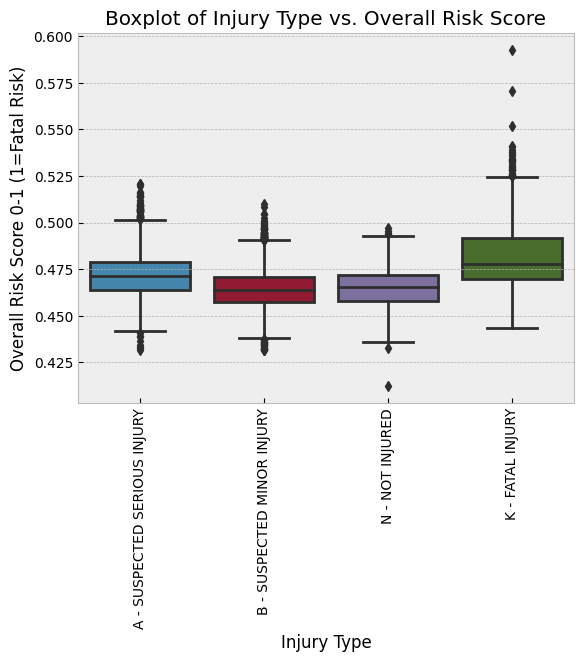

In [26]:
# Show boxplot of each injury severity
sns.boxplot(data=master, x='person_injury_severity', y='agg_risk_score')
plt.title('Boxplot of Injury Type vs. Overall Risk Score')
plt.xlabel('Injury Type')
plt.xticks(rotation=90)
plt.ylabel('Overall Risk Score 0-1 (1=Fatal Risk)')
plt.show()

<div style='background-color:orange'>
<a id="misc"></a>
    <h1 style='text-align:center ; top-padding:5px'>
        <b><i>
            Miscellaneous
        </i></b></h1>
    <li><a href='#TableOfContents'>Table of Contents</a>
    </li>
</div>